<a href="https://colab.research.google.com/github/JadeGome/stock/blob/main/Project_1_part_2_Jade_Gomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


def quarter(month=True):
  temp=month/3
  if temp<=1:
    return 1
  elif temp>1 and temp<=2:
    return 2
  elif temp>2 and temp<=3:
    return 3
  else:
    return 4


ticker='IBM'

def Stocks(ticker=True):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol='+ticker+'&apikey=2VD17WDC3A2XXZHP'
  r = requests.get(url)
  data = r.json()
  stock=pd.DataFrame.from_dict(data['Monthly Adjusted Time Series']).T
  stock.reset_index(inplace=True)
  stock.rename(columns={'index':'date'},inplace=True)
  stock['date']=pd.to_datetime(stock['date'])
  stock['year']=stock['date'].dt.year
  stock['month']=stock['date'].dt.month
  columns=stock.columns
  for i in columns[1:8]:
    stock[i]=stock[i].astype(float)
  stock['quarter']=stock.apply(lambda x: quarter(x['month']),axis=1)
  stock=stock.groupby(['year','quarter'])['1. open','7. dividend amount'].mean().reset_index()
  stock.rename(columns={'1. open':'open','7. dividend amount':'dividend'},inplace=True)
  stock['ticker']=ticker
  return stock

def Earnings(ticker=True):
  url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol='+ticker+'&apikey=2VD17WDC3A2XXZHP'
  r = requests.get(url)
  data = r.json()
  earnings = pd.DataFrame.from_dict(data['quarterlyEarnings'])
  earnings.rename(columns={'fiscalDateEnding':'date'}, inplace=True)
  earnings['date']= pd.to_datetime(earnings['date'])
  earnings['month']=earnings['date'].dt.month
  earnings['year']=earnings['date'].dt.year
  if ticker=='A':
    earnings['month']=earnings['month']-1
    def fudgethis(month=True):
      if month==0:
        return 12
      else:
        return month
    earnings['month']=earnings.apply(lambda x: fudgethis(x['month']),axis=1)
  earnings['quarter']=earnings['month']/3
  earnings['ticker']=ticker
  earnings=earnings[['date','estimatedEPS','quarter','year','ticker']]
  earnings['estimateEPS']=earnings['estimatedEPS'].astype(float)
  return earnings 




In [48]:
ticker='A'
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol='+ticker+'&apikey=2VD17WDC3A2XXZHP'
r = requests.get(url)
data = r.json()
earnings = pd.DataFrame.from_dict(data['quarterlyEarnings'])
earnings.rename(columns={'fiscalDateEnding':'date'}, inplace=True)
earnings['date']= pd.to_datetime(earnings['date'])
earnings['month']=earnings['date'].dt.month
earnings['year']=earnings['date'].dt.year
earnings['quarter']=earnings['month']/3
earnings['ticker']=ticker
#earnings=earnings[['date','estimatedEPS','quarter','year','ticker']]
earnings['estimateEPS']=earnings['estimatedEPS'].astype(float)
earnings

,date,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,month,year,quarter,ticker,estimateEPS
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,1,2022,0.333333,A,1.1800
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,10,2021,3.333333,A,1.1763
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,7,2021,2.333333,A,0.9946
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,4,2021,1.333333,A,0.8339
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,1,2021,0.333333,A,0.9006
...,...,...,...,...,...,...,...,...,...,...,...
84,2001-01-31,2001-02-20,0.51,0.45,0.06,13.3333,1,2001,0.333333,A,0.4500
85,2000-10-31,2000-11-20,0.73,0.54,0.19,35.1852,10,2000,3.333333,A,0.5400
86,2000-07-31,2000-08-17,0.39,0.2,0.19,95,7,2000,2.333333,A,0.2000
87,2000-04-30,2000-05-16,0.35,0.32,0.03,9.375,4,2000,1.333333,A,0.3200


In [49]:
A=Stocks(ticker='A')
IBM=Stocks(ticker='IBM')

pd.concat([IBM,A])

stock_list=['IBM','A']
earnings_panel=pd.DataFrame()
stocks_panel=pd.DataFrame()
for j in stock_list:
  T = Earnings(ticker=j)
  earnings_panel = pd.concat([earnings_panel,T])
  S = Stocks(ticker=j)
  stocks_panel=pd.concat([stocks_panel,S])
stocks_panel



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,year,quarter,open,dividend,ticker
0,1999,4,102.560000,0.000000,IBM
1,2000,1,108.936667,0.040000,IBM
2,2000,2,113.353333,0.043333,IBM
3,2000,3,117.936667,0.043333,IBM
4,2000,4,101.833333,0.043333,IBM
...,...,...,...,...,...
86,2021,2,133.820000,0.064667,A
87,2021,3,158.953333,0.064667,A
88,2021,4,155.216667,0.064667,A
89,2022,1,143.453333,0.070000,A


In [78]:
Merge= stocks_panel.merge(earnings_panel,how='inner')
Merge['PE_ratio']=PE_ratio
Merge


,year,quarter,open,dividend,ticker,date,estimatedEPS,estimateEPS,PE_ratio
0,1999,4,102.560000,0.000000,IBM,1999-12-31,1.06,1.0600,96.754717
1,2000,1,108.936667,0.040000,IBM,2000-03-31,0.78,0.7800,139.713675
2,2000,2,113.353333,0.043333,IBM,2000-06-30,1,1.0000,113.396667
3,2000,3,117.936667,0.043333,IBM,2000-09-30,1.08,1.0800,109.240741
4,2000,4,101.833333,0.043333,IBM,2000-12-31,1.46,1.4600,69.778539
...,...,...,...,...,...,...,...,...,...
173,2020,4,107.623333,0.060000,A,2020-01-31,0.8087,0.8087,133.156094
174,2021,1,120.893333,0.064667,A,2021-04-30,0.8339,0.8339,145.050965
175,2021,2,133.820000,0.064667,A,2021-07-31,0.9946,0.9946,134.611569
176,2021,3,158.953333,0.064667,A,2021-10-31,1.1763,1.1763,135.184902


In [90]:
pearson_coef, p_value = stats.pearsonr(Merge['year'], Merge['PE_ratio'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with no correlation')

The Pearson Correlation Coefficient is 0.0174299190074345 with no correlation


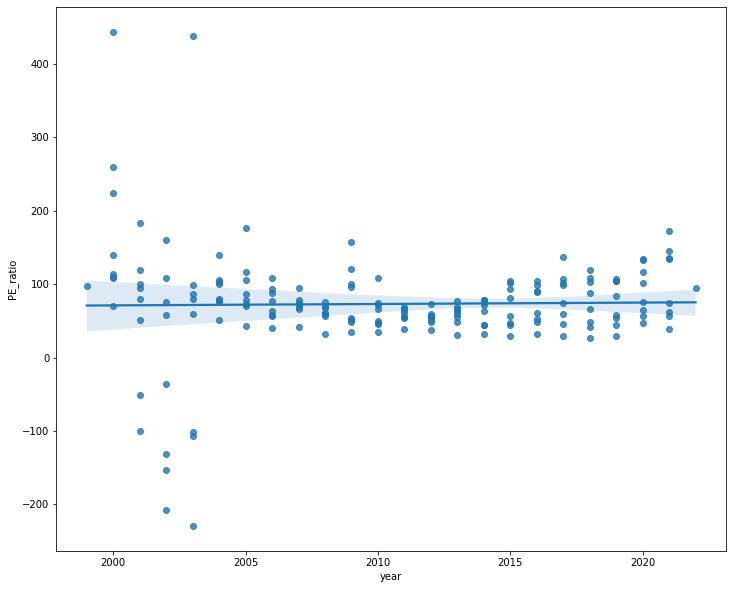

In [111]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="year", y="PE_ratio", data=Merge)

In [131]:
Merge.corr()

,year,quarter,open,dividend,estimateEPS,PE_ratio
year,1.000000,-0.026860,0.382341,0.285660,0.373940,0.017430
quarter,-0.026860,1.000000,-0.006603,0.095890,0.210019,-0.082154
open,0.382341,-0.006603,1.000000,0.268820,0.854299,-0.018226
dividend,0.285660,0.095890,0.268820,1.000000,0.297129,-0.068022
estimateEPS,0.373940,0.210019,0.854299,0.297129,1.000000,-0.174696
PE_ratio,0.017430,-0.082154,-0.018226,-0.068022,-0.174696,1.000000
